# **Deap Learning 1 : Linear Regression**

+ date : 2023.10.06.(금) <br>
+ author : 최호진 <br>
+ project : 개인 프로젝트<br>
+ github : https://github.com/Gansaw <br>
+ tistory : https://gansaw12.tistory.com <br>
+ email : gansaw12@gmail.com <br> <br>

---


# 1. 목표 #

a. 선형회귀분석에 필요한 기본 library를 import한다.

        tensorflow
        numpy
        matplotlib  
b. Linear Regression(선형회귀분석)에 필요한 작업을 수행한다.

c. 단일선형회귀분석, 다중선형회귀분석, 로지스틱회귀분석

a. 선형회귀분석에 필요한 기본 library를 import한다.

    tensorflow
    numpy
    matplotlib  

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 2. 단일선형회귀분석 #

  + Simple Linear Regression을 수행한다.
  + numpy를 이용하여 데이터를 로드한다.
  + x,y 좌표를 읽어서 배열로 저장하고 x배열, y배열로 따로 저장한다.
  ㅁ

In [2]:
# 데이터 로드하기
sr_data = "./data/simple_regression.txt"
sr = np.loadtxt(sr_data)
sr_x = sr[:, 0].reshape(-1, 1)
sr_y = sr[:, 1]

print(sr_x)
print()
print(sr_y)

[[50.496375]
 [69.017336]
 [ 6.504676]
 [47.202416]
 [40.42739 ]
 [15.258608]
 [32.444642]
 [51.332003]
 [30.384774]
 [11.333958]
 [14.756302]
 [67.13818 ]
 [62.027474]
 [30.262427]
 [24.907328]
 [49.818682]
 [31.089285]
 [37.437399]
 [45.713274]
 [20.135743]
 [35.496204]
 [35.217918]
 [-2.462339]
 [15.504408]
 [ 8.540072]
 [62.464219]
 [29.169664]
 [37.718168]
 [14.635353]
 [ 9.71068 ]
 [55.952296]
 [40.06951 ]
 [68.572343]
 [20.406405]
 [24.264395]
 [29.022853]
 [38.145868]
 [37.077037]
 [66.600359]
 [32.949568]
 [31.220697]
 [56.978772]
 [54.274524]
 [63.37192 ]
 [15.688089]
 [54.948229]
 [29.672139]
 [57.671203]
 [25.526581]
 [34.821091]
 [ 3.690326]
 [10.659872]
 [16.703429]
 [31.735639]
 [14.917495]
 [42.721395]
 [27.291772]
 [14.485518]
 [21.443083]
 [ 5.965769]
 [33.247386]
 [63.20145 ]
 [46.459512]
 [16.287332]
 [19.58972 ]
 [11.606064]
 [49.159971]
 [54.300311]
 [10.494688]
 [64.386625]
 [57.418799]
 [20.407553]
 [37.676875]
 [66.887593]
 [67.211215]
 [53.953845]
 [58.742402]

In [3]:
# 단일선형회귀모델 정의
class LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.dense = tf.keras.layers.Dense(units=1, input_shape=(1,))

    def call(self, inputs):
        return self.dense(inputs)

In [4]:
# 모델 정의
sr_model = LinearRegressionModel()

# 모델 컴파일
sr_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
sr_model.fit(sr_x, sr_y, epochs=1000, verbose=0)

In [5]:
# 가중치, 절편
weights, biases = sr_model.layers[0].get_weights()
coefficients = weights[0][0]
intercept = biases[0]

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: 0.1527203
Intercept: -0.50732243


4/4 [==============================] - 0s 1000us/step


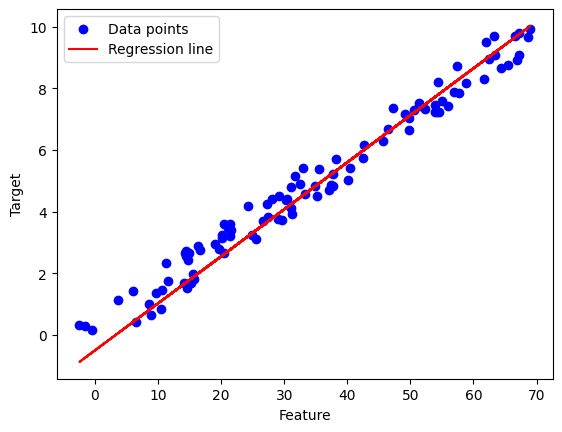

In [6]:
# Scatter Plot
plt.scatter(sr_x, sr_y, color='blue', label='Data points')

# Line Graph
plt.plot(sr_x, sr_model.predict(sr_x), color='red', label='Regression line')

# 그래프 그리기
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# 3. 다중선형회귀분석 #

  + Multiple Linear Regression을 수행한다.
  + numpy를 이용하여 데이터를 로드한다.
  + x,y 좌표를 읽어서 배열로 저장하고 x배열, y배열로 따로 저장한다.
  + Tensorflow를 이용하여 MSE(최소제곱오차)를 계산한다.

In [7]:
# 데이터 로드하기
mr_data = "./data/multiple_regression.txt"
mr = np.loadtxt(mr_data)
mr_x = mr[:, :-1]
mr_y = mr[:, -1]

print(mr_x)
print()
print(mr_y)

[[1. 0.]
 [0. 2.]
 [3. 0.]
 [0. 4.]
 [5. 0.]]

[1. 2. 3. 4. 5.]


In [8]:
# 다중선형회귀모델 정의
class MultipleLinearRegressionModel(tf.keras.Model):
    def __init__(self, num_features):
        super(MultipleLinearRegressionModel, self).__init__()
        self.dense = tf.keras.layers.Dense(units=1, input_shape=(num_features,))

    def call(self, inputs):
        return self.dense(inputs)

In [9]:
# 모델 정의
num_features = mr_x.shape[1]
mr_model = MultipleLinearRegressionModel(num_features)

# 모델 컴파일
mr_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
mr_model.fit(mr_x, mr_y, epochs=1000, verbose=0)

In [10]:
# 가중치, 절편
weights, biases = mr_model.layers[0].get_weights()
coefficients = weights.flatten()
intercept = biases[0]

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.83311373 0.6149211 ]
Intercept: 0.6683534


4/4 [==============================] - 0s 1ms/step


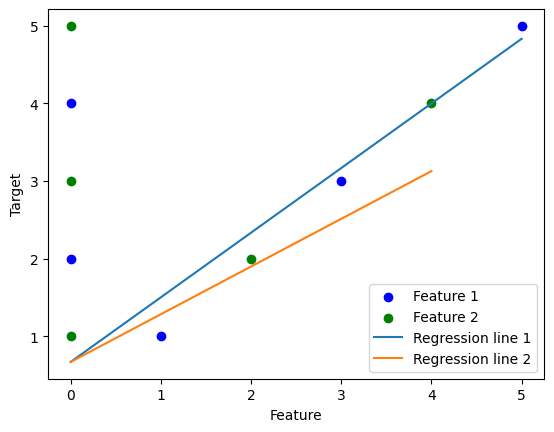

In [11]:
# Scatter Plot
plt.scatter(mr_x[:, 0], mr_y, color='blue', label='Feature 1')
plt.scatter(mr_x[:, 1], mr_y, color='green', label='Feature 2')

# Feature별 Line Graph
for i in range(num_features):
    x_line = np.linspace(np.min(mr_x[:, i]), np.max(mr_x[:, i]), 100)
    x_line_expanded = np.zeros((100, num_features))
    x_line_expanded[:, i] = x_line
    y_line = mr_model.predict(x_line_expanded)[:, 0]
    plt.plot(x_line, y_line, label=f'Regression line {i+1}')

# Plot 그리기
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

# 4. 로지스틱회귀분석 #

  + Logistic Regression을 수행한다.
  + numpy를 이용하여 데이터를 로드한다.
  + x,y 좌표를 읽어서 배열로 저장하고 x배열, y배열로 따로 저장한다.
  + Tensorflow를 이용하여 MSE(최소제곱오차)를 계산한다.

In [12]:
# 데이터 로드하기
lr_data = "./data/logistic_regression.txt"
lr = np.loadtxt(lr_data)
lr_x = lr[:, :-1]
lr_y = lr[:, -1]

print(lr_x)
print()
print(lr_y)

[[1. 2. 1.]
 [1. 3. 2.]
 [1. 3. 4.]
 [1. 5. 5.]
 [1. 7. 5.]
 [1. 2. 5.]]

[0. 0. 0. 1. 1. 1.]


In [13]:
# 로지스틱회귀모델 정의
class LogisticRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.dense = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, inputs):
        return self.dense(inputs)


In [14]:
# 모델 정의
num_features = lr_x.shape[1]
model = LogisticRegressionModel()

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(lr_x, lr_y, epochs=1000, verbose=0)

313/313 [==============================] - 0s 683us/step


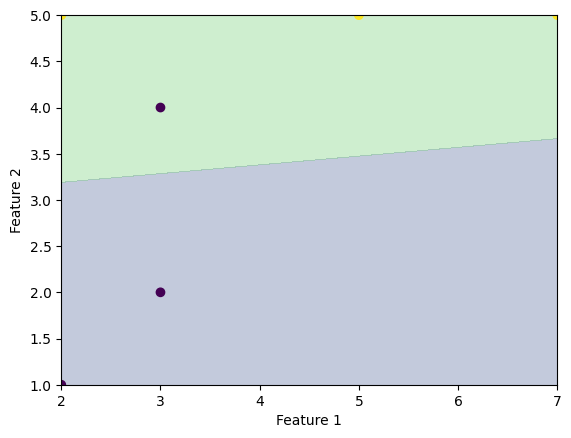

In [15]:
# meshgrid 생성
xx, yy = np.meshgrid(np.linspace(lr_x[:, 1].min(), lr_x[:, 1].max(), 100),
                     np.linspace(lr_x[:, 2].min(), lr_x[:, 2].max(), 100))
Z = model.predict(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()])

# Decision Boundary Plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.3)
plt.scatter(lr_x[:, 1], lr_x[:, 2], c=lr_y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()